In [1]:
# packages
using Distributions
using Random
using Plots
using Distances

In [2]:
# ackley function

function ackley(x)
    # x = [x1, x2, ..., xd]
    # a = default value 20
    # b = default value 0.2
    # c = default value 2*pi
    a = 20
    b = 0.2
    c = 2*π
    n = length(x)
    sum1 = 0
    sum2 = 0
    for i in 1:n
        sum1 += x[i]^2
        sum2 += cos(c*x[i])
    end
    
    term1 = -a * exp(-b*sqrt(sum1/n))
    term2 = -exp(sum2/n)
    y = term1 + term2 + a + exp(1)
    return y
end

ackley (generic function with 1 method)

In [3]:
# rastrigin function

function rastrigin(x)
    val = -10length(x)
    n = length(x)
    for i in 1:n
        val += -x[i]^2+10cos(π*x[i])
    end
    val =-val
    return val
end

rastrigin (generic function with 1 method)

In [4]:
# zirilli function

function zirilli2(x)
    x1 = x[1]
    x2 = x[2]
    val = (0.5 * (x1 ^ 2)) + (0.5 * (1 - cos(2*x1)) ) + (x2 ^ 2)
    return val
end

zirilli2 (generic function with 1 method)

In [5]:
# matyas function

function matyas2(x)
    x1 = x[1]
    x2 = x[2]
    val = (0.26 * ((x1 ^ 2) + (x2 ^ 2) ))  - (0.48 * x1 * x2)
    return val
end

matyas2 (generic function with 1 method)

In [6]:
# De Jong (sphere) function

sphere(x)=sum(x.^2)

sphere (generic function with 1 method)

In [7]:
# Schwefel 2.22 function

function schwefel_2_22(x)
    sum = 0
    prod = 1
    n = length(x)
    for i in 1:n
        sum += abs(x[i])
        prod *= abs(x[i])
    end
    val = sum+ prod
    return val
end

schwefel_2_22 (generic function with 1 method)

In [8]:
# population generator
function rand_population_uniform(n, d, a, b)
    # n = population size
    # a = lower bound
    # b = upper bound
    # d = dimensions
    return [convert(Array{Float64},rand(a:b,d)) for i in 1:n]
end

rand_population_uniform (generic function with 1 method)

In [9]:
# benchmark / landscape function


#obj_func(x) = sphere(x)
#obj_func(x) = schwefel_2_22(x)

#obj_func(x) = ackley(x)
obj_func(x) = rastrigin(x)

#obj_func(x) = matyas2(x)
#obj_func(x) = zirilli2(x)

obj_func (generic function with 1 method)

In [10]:
# intensity function

function intensity(N, x, x_prey)
    d = zeros(N)
    S = zeros(N)
    I = zeros(N)
    for i in 1:N-1
        d[i] = euclidean(x[i], x_prey) ^ 2
        S[i] = euclidean(x[i],x[i+1]) ^ 2
    end
    
    d[N] = euclidean(x[N], x_prey)
    S[N] = euclidean(x[N],x[1])
    
    
    
    for i in 1:N
        r2 = rand(Uniform(0,1))
        I[i] = r2 * S[i] / (4 * π * d[i] )
    end
    return I
end

intensity (generic function with 1 method)

In [21]:
# Honey Badger Algorithm

function honey_badger_algorithm(t_max, N, beta, C, x, obj_func)
    # t_max = maximum no of iterations
    # N = population size
    # beta = default value as 6
    # C = default value as 2
    # x = initial population
    # obj_func = benchmark function
    # f = fitness of the population
    # x_prey = best position found so far
    # f_prey = best fitness value so far for the x_prey
    # x_new = new position calculated for the ith honey badger
    # f_new = new fitness calculated for the ith honey badger
    # I = intensity of the honey badger
    # F = disturbance direction
    
    #calucalte the fitness of each honey badger
    f = obj_func.(x)
    #println("fitness vecor: ", f)
    
    #save best posiiton and fitness
    f_prey, x_prey_index = findmin(f)
    x_prey = x[x_prey_index]
    #println("best solution: ", x_prey, " fitness: ", f_prey)
    println("fitness: ", f_prey)
    fitness_values = []
    push!(fitness_values,(0,f_prey))
    for t in 1:t_max
        
        #println("iteration: ", t)
        
        #calculate the density factor / decreasing factor
        alpha = C * exp(-t / t_max)
        #println("alpha: ", alpha)
        
        #calcualte the intensity of the all honey badgers
        I = intensity(N, x, x_prey)
        #println("Intensity: ", I)
        
        for i in 1:N
            
            #println("Honey badger #: ", i)
            
            #calcuate distance between prey and ith honey badger
            d = x_prey - x[i]
            
            #generate disturbance
            r6 = rand(Uniform(0,1))
            if r6<=0.5
                F = 1
            else
                F = -1
            end
            
            
            #generate a random value to deicde between digging vs honey mode
            r2 = rand(Uniform(0,1))
            
            #TODO : if intensity is infinite then go for honey mode
            if isinf(I[i])
                r2 = 0.9
            end
            
            if r2<0.5
                # digging mode
                #println("Digging mode")
                r3 = rand(Uniform(0,1))
                r4 = rand(Uniform(0,1))
                r5 = rand(Uniform(0,1))
                #println("Intensity: ", I[i])
                #p = abs(cos(2*π*r4) * (1 - cos(2*π*r5)))
                #println("cos value: ", p)
                x_new = x_prey + (F * beta * I[i] * x_prey) + (F * r3 * alpha * d * abs(cos(2*π*r4) * (1 - cos(2*π*r5))))
                f_new = obj_func(x_new)
            
            else
                # honey node
                #println("Honey mode")
                r7 = rand(Uniform(0,1))
                x_new = x_prey + (F * r7 * alpha * d)
                f_new = obj_func(x_new)
            end
            
            #TODO: mange xnew to be within the bounds
            
            # evaluate the new posiiton and fitness values
            
            #local position update
            if f_new < f[i]
                #println("local position is improved")
                #println("values", x[i], ";", x_new, ";", f[i], ";", f_new  )
                x[i] = x_new
                f[i] = f_new
                
                #println("local position is improved fin")
            end
            
            #prey position update
            if f_new<f_prey
                #println("prey position is improved with honey badger # ", i)
                x_prey = x_new
                f_prey = f_new
            end
            
        end
        push!(fitness_values,(t,f_prey))
        #println("fitness: ", f_prey)
    end
   return x_prey, f_prey, fitness_values 
end
    

honey_badger_algorithm (generic function with 1 method)

fitness: 473.4543514111748
best solution: [-2.139839352297938e-9, 1.0629343026633014e-9, -9.823448891983125e-11, 1.836879673944346e-9, -2.0986681495498686e-9, 4.853792559630036e-10, -6.035779863511412e-10, 6.088460868892118e-10, -4.357994631344653e-10, -2.3973748978067594e-9, 1.2879553057155642e-9, -8.074479483870787e-10, -2.4224612060573794e-9, 1.3179084891601786e-9, 6.780893031343921e-10, -3.3872530038460937e-9, 1.7028556587680213e-9, -3.776193679992193e-9, 1.3280577424710754e-9, 1.7212293791865229e-9, -1.2640974490070561e-9, 5.788889954899663e-10, 2.5740484897978494e-9, 6.043720394915287e-10, -3.0328396853212763e-9, 2.211835945743778e-9, 1.2983188048188712e-10, 1.0742580287351191e-9, 1.259554218975289e-9, 3.289174706223269e-10] fitness: -0.0
****Convergennce Graph****
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[473.4543514111748, 234.40461766017293, 10.367488080330979, 8.765591278177222, 0.021719260976313493, 0.021710919154141806, 0.004128774555535841

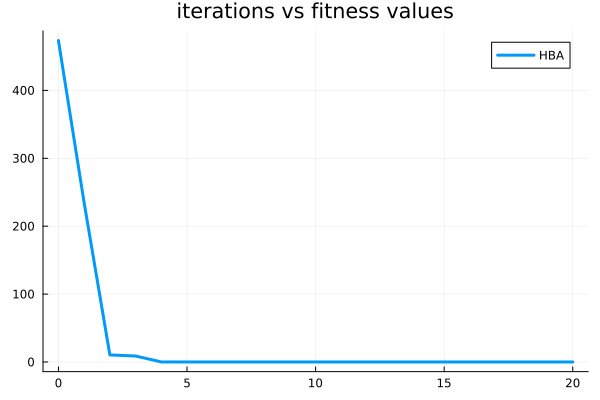

In [25]:
#import Random: seed!

#seed!(0) # set random seed for reproducible results

#dimensions
d = 30
#lower bound
a = -5.12
#upper bound
b = 5.12
# population size
N = 50
#iterations
t_max = 20
#constant beta
beta = 6
#constant C
C = 2
#generate honey badgers
x = rand_population_uniform(N, d, a, b)

#println("intitial population: ", x)
x_prey, f_prey, fitness_values = honey_badger_algorithm(t_max, N, beta, C, x, obj_func)
println("best solution: ", x_prey, " fitness: ", f_prey)

println("****Convergennce Graph****")
x_val = first.(fitness_values)
y_val = last.(fitness_values)
println(x_val)
println(y_val)

plot(x_val, y_val, title="iterations vs fitness values", label="HBA", linewidth=3)




In [29]:
#import Random: seed!

#seed!(0) # set random seed for reproducible results

#dimensions
d = 30
#lower bound
a = -5.12
#upper bound
b = 5.12
# population size
N = 50
#iterations
t_max = 20
#constant beta
beta = 6
#constant C
C = 2
#generate honey badgers
x = rand_population_uniform(N, d, a, b)

#println("intitial population: ", x)
best_fitness = []
for i in 1:30
    x_prey, f_prey, fitness_values = honey_badger_algorithm(t_max, N, beta, C, x, obj_func)
    #println("best solution: ", x_prey, " fitness: ", f_prey)
    push!(best_fitness,f_prey)
end

println(best_fitness)


fitness: 492.96094056447
fitness: -0.0
fitness: -0.0
fitness: -0.0
fitness: -0.0
fitness: -0.0
fitness: -0.0
fitness: -0.0
fitness: -0.0
fitness: -0.0
fitness: -0.0
fitness: -0.0
fitness: -0.0
fitness: -0.0
fitness: -0.0
fitness: -0.0
fitness: -0.0
fitness: -0.0
fitness: -0.0
fitness: -0.0
fitness: -0.0
fitness: -0.0
fitness: -0.0
fitness: -0.0
fitness: -0.0
fitness: -0.0
fitness: -0.0
fitness: -0.0
fitness: -0.0
fitness: -0.0
Any[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0]


In [46]:
I = 1/0
if isinf(I)
    println("Bo")
end

Bo


In [63]:
x =[2,3]
matyas2(x)

0.5

In [65]:
+3.38 - 2.88

0.5

In [ ]:
# Honey Badger Algorithm

function honey_badger_algorithm_beta(t_max, N, beta, C, x, obj_func)
    # t_max = maximum no of iterations
    # N = population size
    # beta = default value as 6
    # C = default value as 2
    # x = initial population
    # obj_func = benchmark function
    # f = fitness of the population
    # x_prey = best position found so far
    # f_prey = best fitness value so far for the x_prey
    # x_new = new position calculated for the ith honey badger
    # f_new = new fitness calculated for the ith honey badger
    # I = intensity of the honey badger
    # F = disturbance direction
    
    #calucalte the fitness of each honey badger
    f = obj_func.(x)
    #println("fitness vecor: ", f)
    
    #save best posiiton and fitness
    f_prey, x_prey_index = findmin(f)
    x_prey = x[x_prey_index]
    #println("best solution: ", x_prey, " fitness: ", f_prey)
    println("fitness: ", f_prey)
    
    for t in 1:t_max
        
        println("iteration: ", t)
        
        #calculate the density factor / decreasing factor
        alpha = C * exp(-t / t_max)
        #println("alpha: ", alpha)
        
        #calcualte the intensity of the all honey badgers
        #I = intensity(N, x, x_prey)
        #println("Intensity: ", I)
        
        for i in 1:N
            
            #println("Honey badger #: ", i)
            
            #calcuate distance between prey and ith honey badger
            d = x_prey - x[i]
            
            if i!=N
                di = euclidean(x[i], x_prey) ^ 2
                si = euclidean(x[i],x[i+1]) ^ 2
            else
                di = euclidean(x[i], x_prey) ^ 2
                si = euclidean(x[i],x[1]) ^ 2
            end
            
            r2 = rand(Uniform(0,1))
            I = r2 * si / (4 * π * di )
            
            #generate disturbance
            r6 = rand(Uniform(0,1))
            if r6<=0.5
                F = 1
            else
                F = -1
            end
            
            
            #generate a random value to deicde between digging vs honey mode
            r2 = rand(Uniform(0,1))
            
            #TODO : if intensity is infinite then go for honey mode
            if isinf(I)
                r2 = 0.9
            end
            
            if r2<0.5
                # digging mode
                #println("Digging mode")
                r3 = rand(Uniform(0,1))
                r4 = rand(Uniform(0,1))
                r5 = rand(Uniform(0,1))
                #println("Intensity: ", I[i])
                #p = abs(cos(2*π*r4) * (1 - cos(2*π*r5)))
                #println("cos value: ", p)
                x_new = x_prey + (F * beta * I * x_prey) + (F * r3 * alpha * d * abs(cos(2*π*r4) * (1 - cos(2*π*r5))))
                f_new = obj_func(x_new)
            
            else
                # honey node
                #println("Honey mode")
                r7 = rand(Uniform(0,1))
                x_new = x_prey + (F * r7 * alpha * d)
                f_new = obj_func(x_new)
            end
            
            #TODO: mange xnew to be within the bounds
            
            # evaluate the new posiiton and fitness values
            
            #local position update
            if f_new < f[i]
                #println("local position is improved")
                #println("values", x[i], ";", x_new, ";", f[i], ";", f_new  )
                x[i] = x_new
                f[i] = f_new
                
                #println("local position is improved fin")
            end
            
            #prey position update
            if f_new < f_prey
                println("prey position is improved with honey badger # ", i)
                x_prey = x_new
                f_prey = f_new
            end
            
        end
        println("fitness: ", f_prey)
    end
   return x_prey, f_prey 
end
    